1. Датасет о погоде. Датасет был взят с сайта www.kaggle.com.
2. Почти все данные в нём числовые, только в weather содержатся строковые. В датасете представлены следующие атрибуты:
- data - дата измерений
- precipitation - выпавшие осадки в мм
- temp_max - максимальная температура в этот день в градусах Цельсия
- temp_min - минимальная температура в этот день в градусах Цельсия
- wind - скорость вертра в м/с
- weather - погодные условия. Принимает значения "drizzle" (морось), "rain" (дождь), "sun" (солнце), "snow" (снег), "fog" (туман)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [87]:
df = pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Добавим атрибут "Максимальная температура по Фаренгейту"

In [89]:
df['temp_max_faren'] = df['temp_max'] * 1.8 + 32
df

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_faren
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,55.04
1,2012-01-02,10.9,10.6,2.8,4.5,rain,51.08
2,2012-01-03,0.8,11.7,7.2,2.3,rain,53.06
3,2012-01-04,20.3,12.2,5.6,4.7,rain,53.96
4,2012-01-05,1.3,8.9,2.8,6.1,rain,48.02
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,39.92
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,41.00
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,44.96
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,42.08


Проверим на наличие пустых значений

In [92]:
df.isna().sum()

date              0
precipitation     0
temp_max          0
temp_min          0
wind              0
weather           0
temp_max_faren    0
dtype: int64

Проверим наличие дубликатов

In [95]:
df.duplicated().sum()

0

Проверим на наличие выбросов

Text(0.5, 0, 'Attributes')

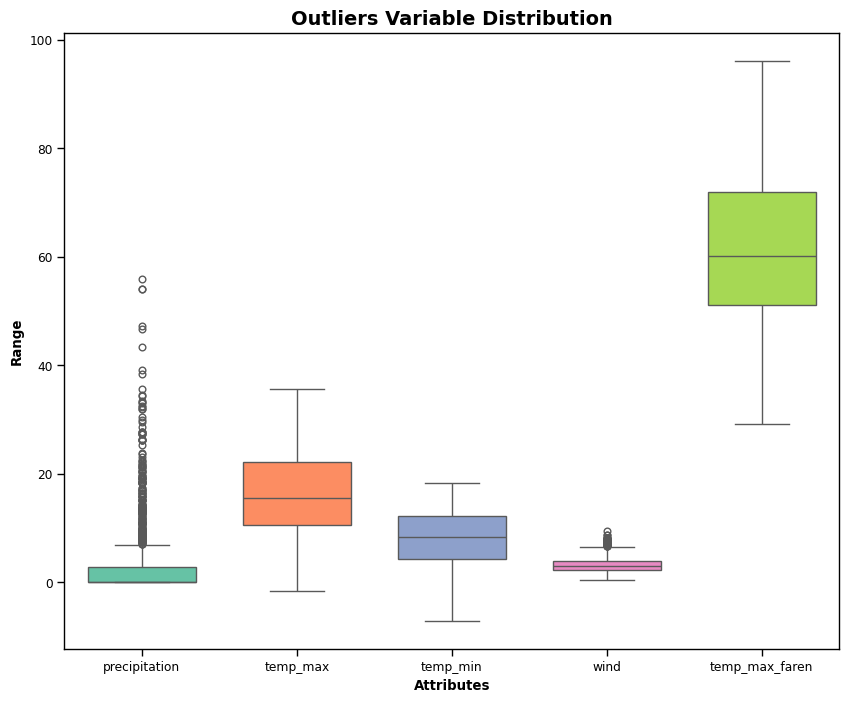

In [97]:
attributes = ['precipitation','temp_max','temp_min', 'wind', 'temp_max_faren']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Удалим найденные выбросы

In [100]:
#Удалим выбросы precipitation
q1 = df['precipitation'].quantile(0.25)
q2 = df['precipitation'].quantile(0.75)
qr = q2 - q1
lowBorder = q1 - 1.5 * qr
upBorder = q2 + 1.5 * qr
df = df[(df['precipitation'] >= lowBorder) & (df['precipitation'] <= upBorder)]

#Удалим выбросы wind
q1 = df['wind'].quantile(0.25)
q2 = df['wind'].quantile(0.75)
qr = q2 - q1
lowBorder = q1 - 1.5 * qr
upBorder = q2 + 1.5 * qr
df = df[(df['wind'] >= lowBorder) & (df['wind'] <= upBorder)]

Text(0.5, 0, 'Attributes')

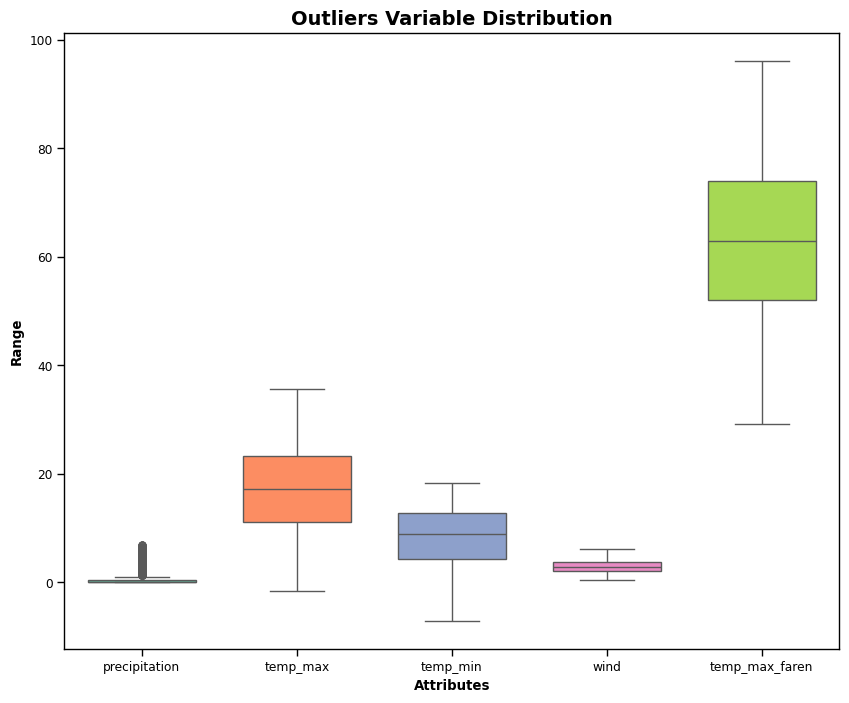

In [101]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [102]:
df

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_faren
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,55.04
2,2012-01-03,0.8,11.7,7.2,2.3,rain,53.06
4,2012-01-05,1.3,8.9,2.8,6.1,rain,48.02
5,2012-01-06,2.5,4.4,2.2,2.2,rain,39.92
6,2012-01-07,0.0,7.2,2.8,2.3,rain,44.96
...,...,...,...,...,...,...,...
1455,2015-12-26,0.0,4.4,0.0,2.5,sun,39.92
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,41.00
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,44.96
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,42.08


Было удалено 250 строк, содержащих выбросы

Посмотрим разпределение погодных условий

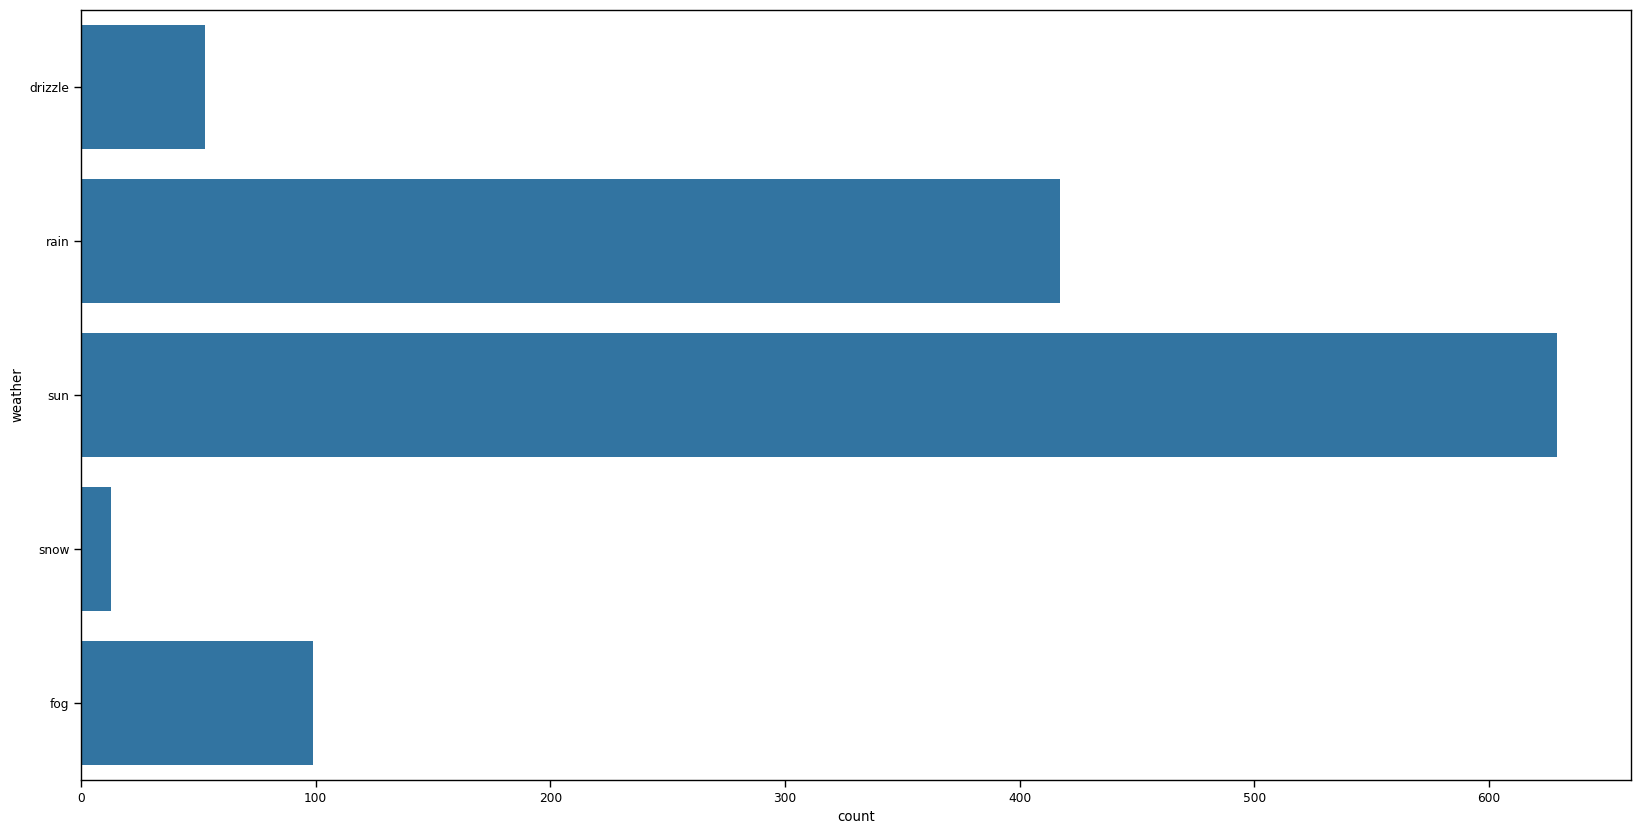

In [106]:
plt.figure(1 , figsize = (20 , 10))
sns.countplot(y = 'weather' , data = df)
plt.show()

Посмотрим корреляцию между атрибутами

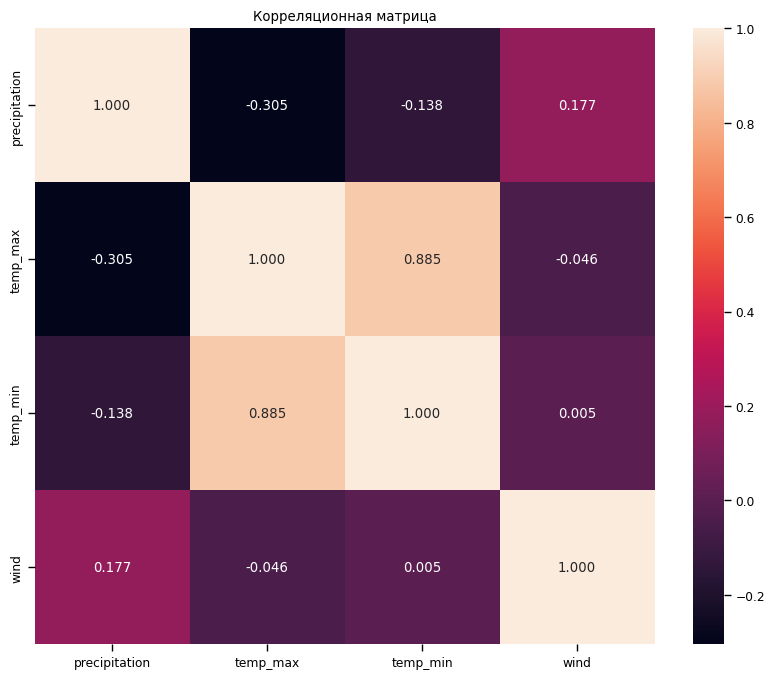

In [108]:
#Корреляционная матрица 
df_num = df[['precipitation','temp_max','temp_min', 'wind']]
sns.set_context('paper')
sns.heatmap(df_num.corr(), annot=True, fmt='.3f')
plt.title('Корреляционная матрица')
plt.show()

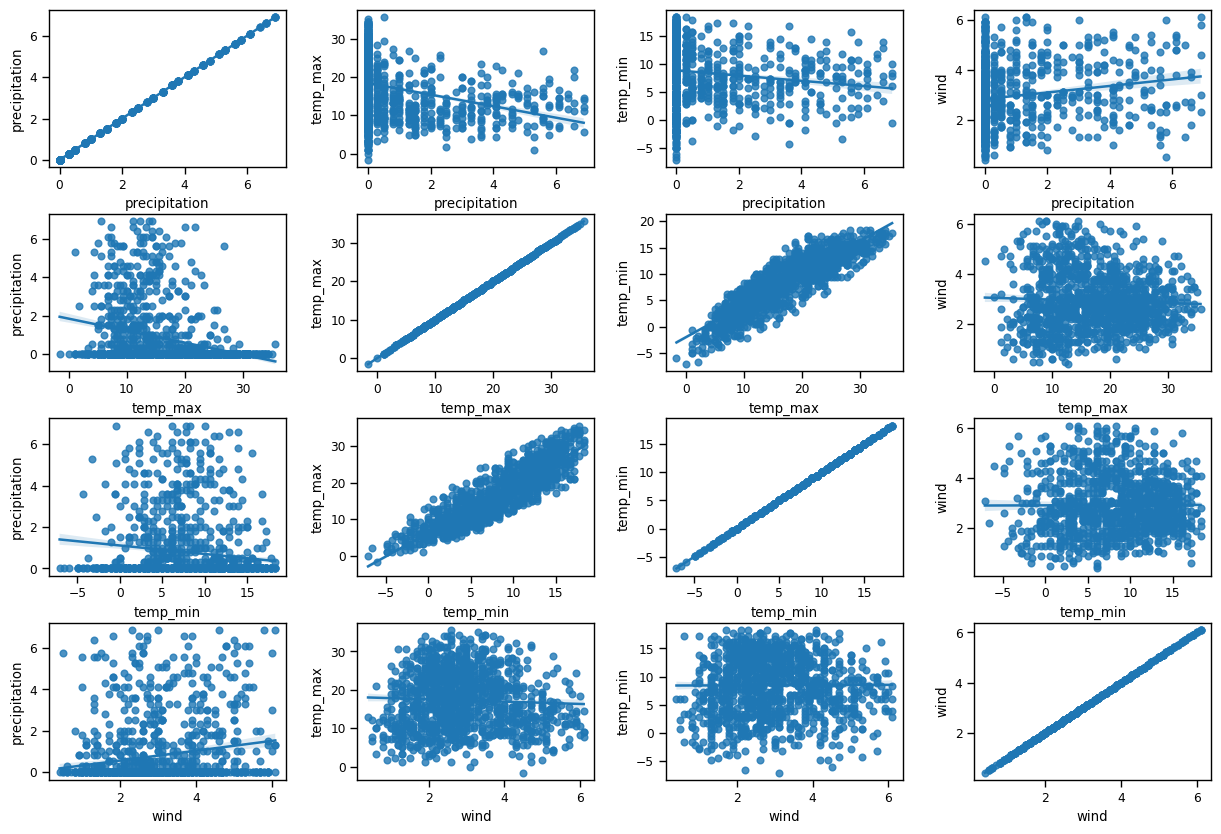

In [110]:
plt.figure(1 , figsize = (15, 10))
n = 0 
for x in ['precipitation','temp_max','temp_min', 'wind']:
    for y in ['precipitation','temp_max','temp_min', 'wind']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Нормализуем данные для дальнейшей кластеризации

In [112]:
scaler = StandardScaler()
df_st = scaler.fit_transform(df_num)
df_st = pd.DataFrame(df_st)
df_st.columns = ['precipitation','temp_max','temp_min', 'wind']
df_st

,precipitation,temp_max,temp_min,wind
0,-0.495387,-0.589520,-0.669458,1.553572
1,0.023682,-0.735283,-0.244788,-0.551071
2,0.348100,-1.106317,-1.094128,2.781281
3,1.126703,-1.702621,-1.209947,-0.638765
4,-0.495387,-1.331587,-1.094128,-0.551071
...,...,...,...,...
1206,-0.495387,-1.702621,-1.634617,-0.375684
1207,0.477867,-1.623114,-1.306463,-1.428006
1208,-0.495387,-1.331587,-1.518798,-0.287991
1209,-0.495387,-1.543607,-1.827649,0.413557


Построим графики зависимости одной переменной от другой

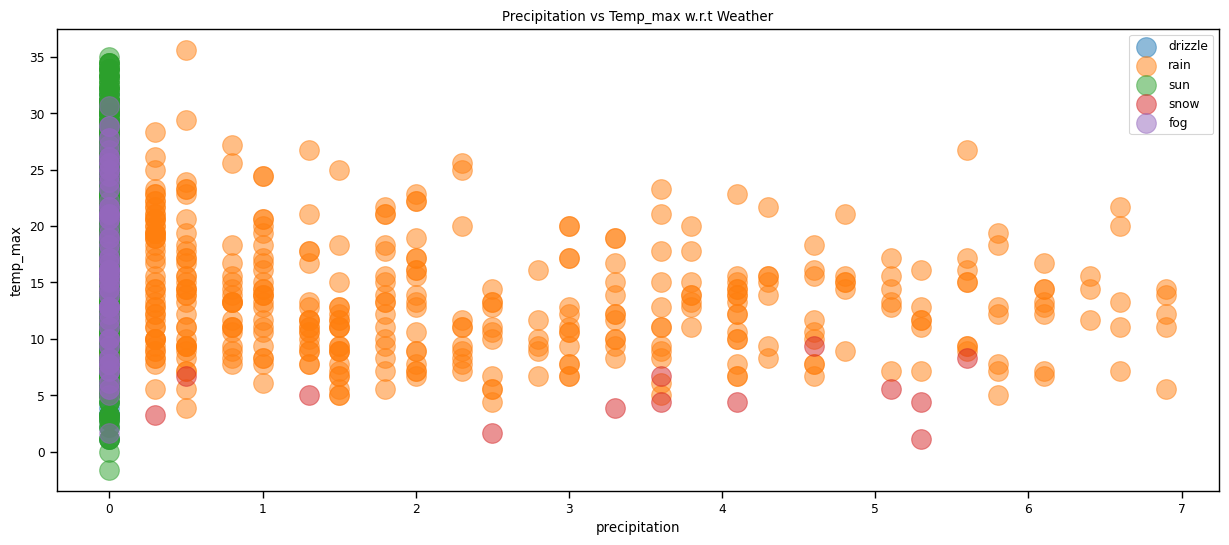

In [115]:
plt.figure(1 , figsize = (15 , 6))
for weather in ['drizzle', 'rain', 'sun', 'snow', 'fog']:
    plt.scatter(x = 'precipitation', y = 'temp_max', data = df[df['weather'] == weather], s = 200, alpha = 0.5, label = weather)
plt.xlabel('precipitation')
plt.ylabel('temp_max')
plt.title('Precipitation vs Temp_max w.r.t Weather')
plt.legend()
plt.show()

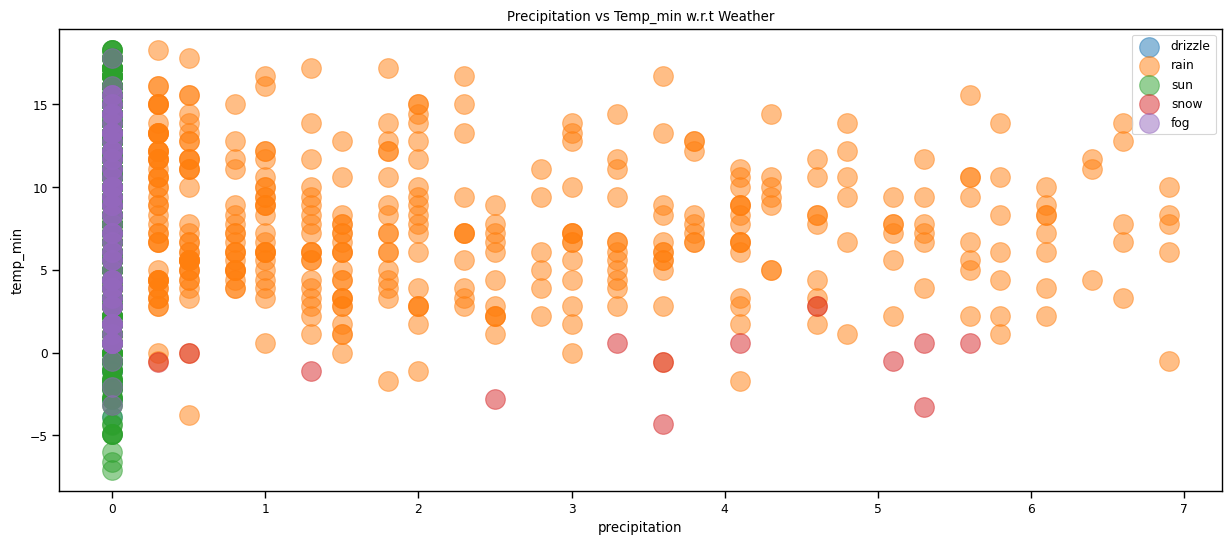

In [118]:
plt.figure(1 , figsize = (15 , 6))
for weather in ['drizzle', 'rain', 'sun', 'snow', 'fog']:
    plt.scatter(x = 'precipitation', y = 'temp_min', data = df[df['weather'] == weather], s = 200, alpha = 0.5, label = weather)
plt.xlabel('precipitation')
plt.ylabel('temp_min')
plt.title('Precipitation vs Temp_min w.r.t Weather')
plt.legend()
plt.show()

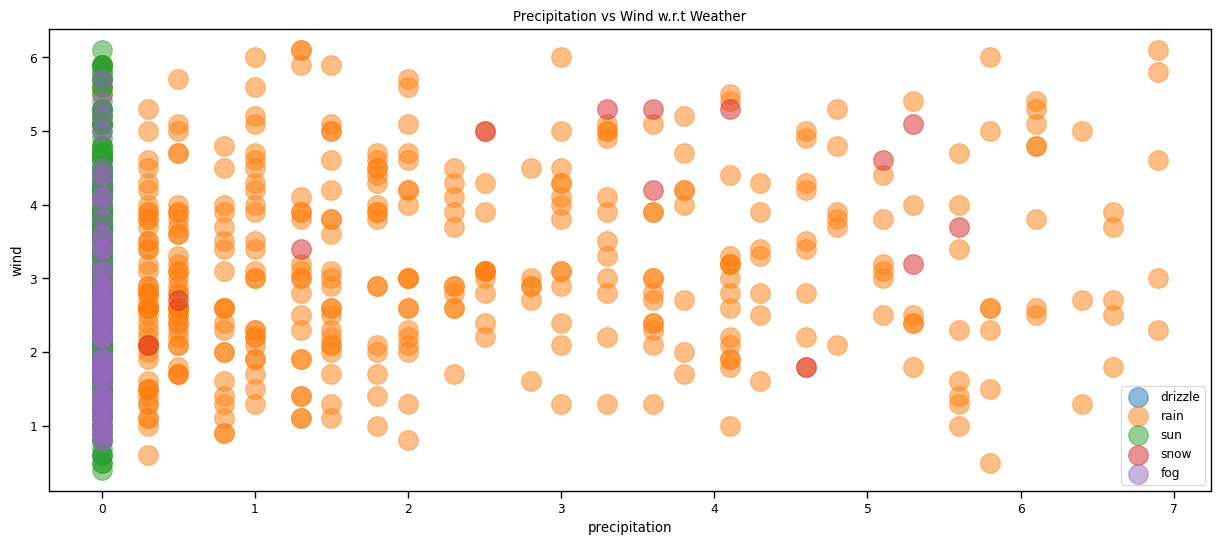

In [119]:
plt.figure(1 , figsize = (15 , 6))
for weather in ['drizzle', 'rain', 'sun', 'snow', 'fog']:
    plt.scatter(x = 'precipitation', y = 'wind', data = df[df['weather'] == weather], s = 200, alpha = 0.5, label = weather)
plt.xlabel('precipitation')
plt.ylabel('wind')
plt.title('Precipitation vs Wind w.r.t Weather')
plt.legend()
plt.show()

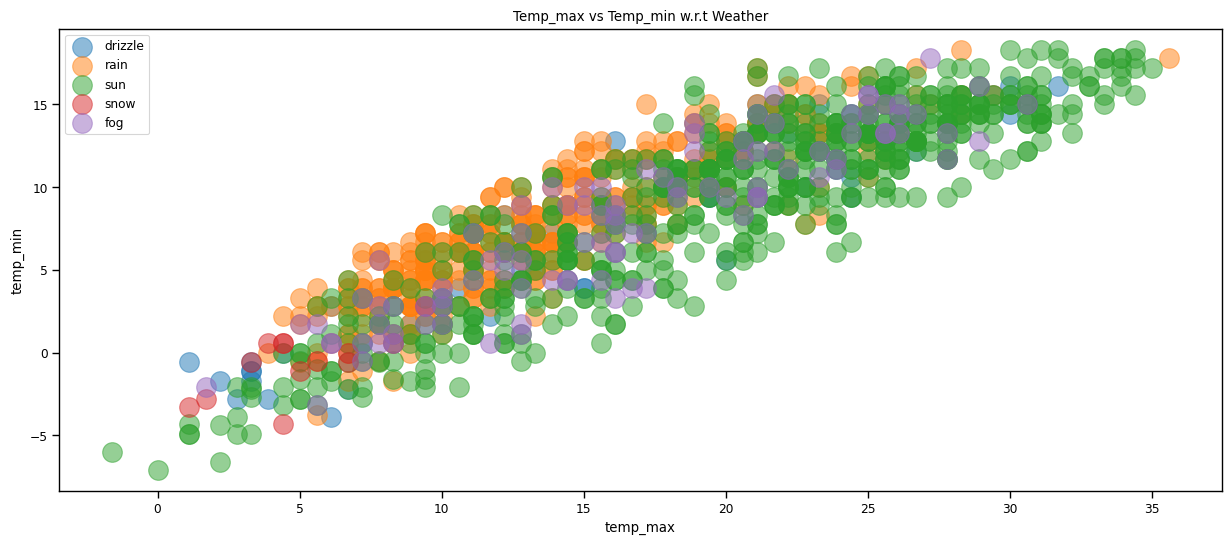

In [120]:
plt.figure(1 , figsize = (15 , 6))
for weather in ['drizzle', 'rain', 'sun', 'snow', 'fog']:
    plt.scatter(x = 'temp_max', y = 'temp_min', data = df[df['weather'] == weather], s = 200, alpha = 0.5, label = weather)
plt.xlabel('temp_max')
plt.ylabel('temp_min')
plt.title('Temp_max vs Temp_min w.r.t Weather')
plt.legend()
plt.show()

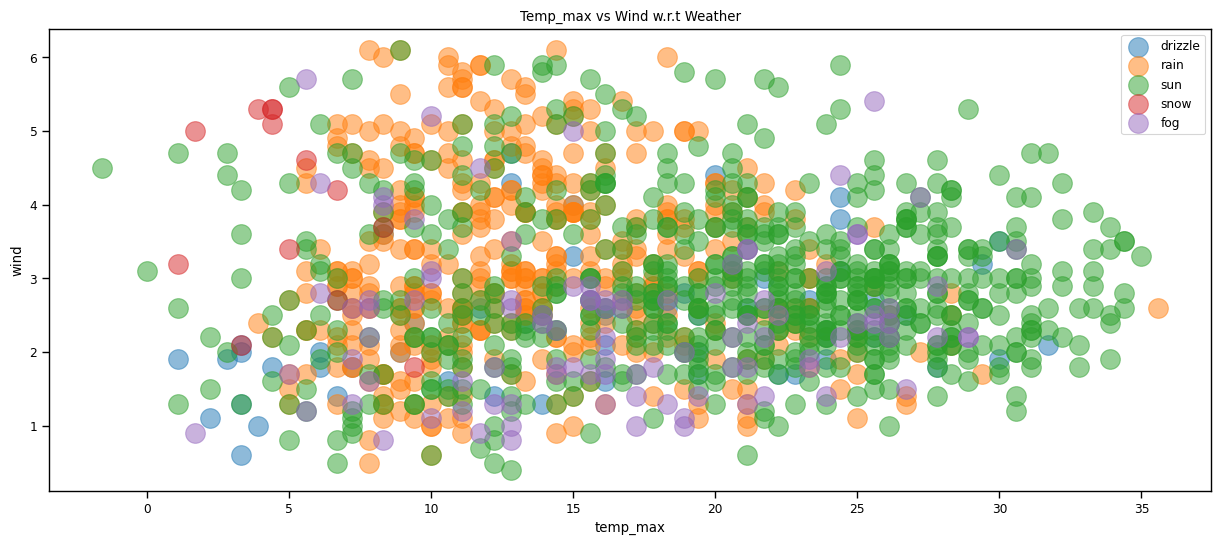

In [121]:
plt.figure(1 , figsize = (15 , 6))
for weather in ['drizzle', 'rain', 'sun', 'snow', 'fog']:
    plt.scatter(x = 'temp_max', y = 'wind', data = df[df['weather'] == weather], s = 200, alpha = 0.5, label = weather)
plt.xlabel('temp_max')
plt.ylabel('wind')
plt.title('Temp_max vs Wind w.r.t Weather')
plt.legend()
plt.show()

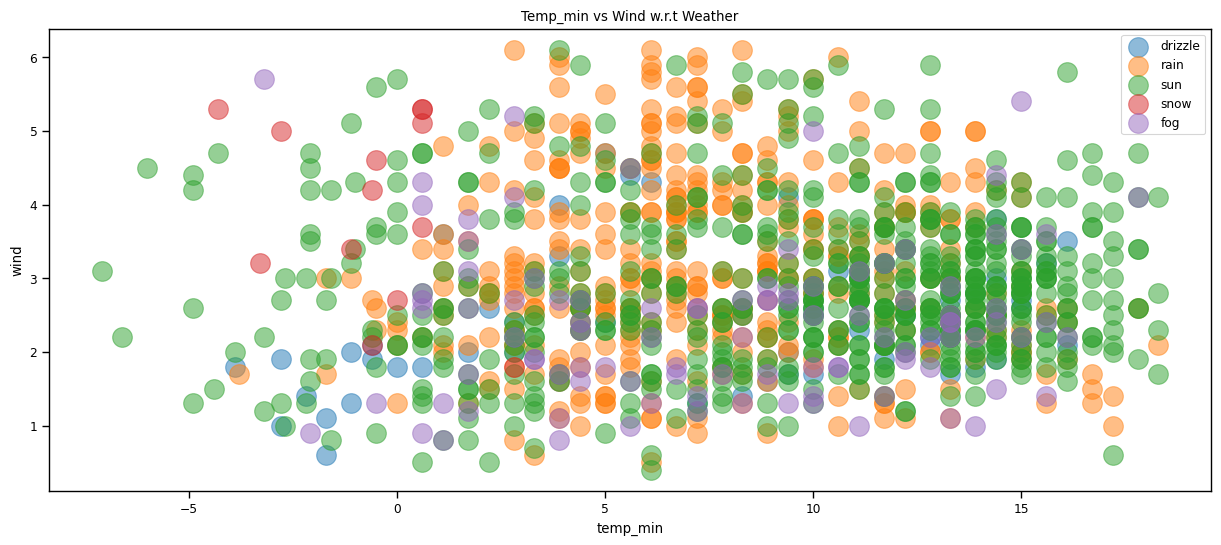

In [122]:
plt.figure(1 , figsize = (15 , 6))
for weather in ['drizzle', 'rain', 'sun', 'snow', 'fog']:
    plt.scatter(x = 'temp_min', y = 'wind', data = df[df['weather'] == weather], s = 200, alpha = 0.5, label = weather)
plt.xlabel('temp_min')
plt.ylabel('wind')
plt.title('Temp_min vs Wind w.r.t Weather')
plt.legend()
plt.show()

Перед кластризацией методом k means определим количество кластеров с помощью метода локтя

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


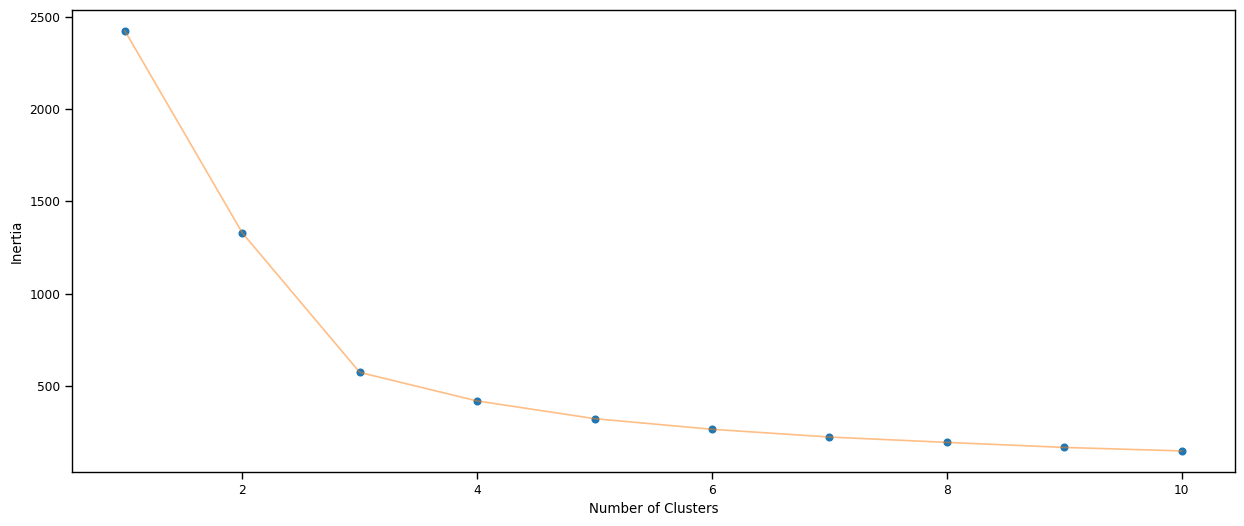

In [125]:
X1 = df_st[['precipitation', 'temp_max']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Инерция перестаёт существенно уменьшаться после 5 кластеров

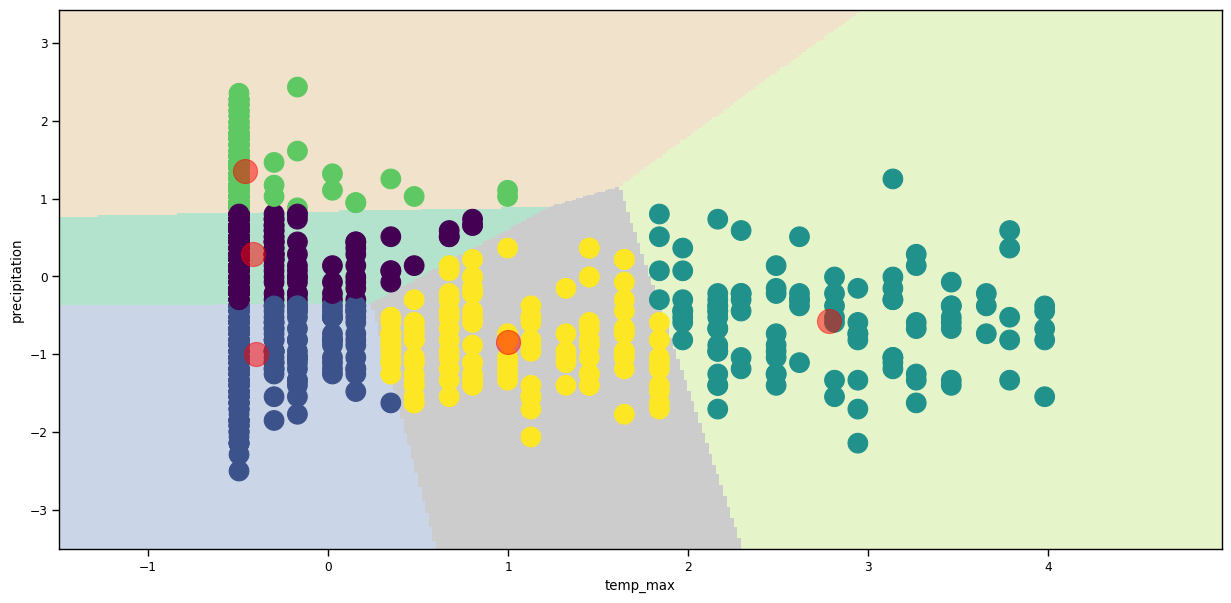

In [128]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
kmeans.fit(X1)

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'precipitation', y = 'temp_max' , data = df_st , c = kmeans.labels_ , 
            s = 200 )
plt.scatter(x = kmeans.cluster_centers_[: , 0] , y =  kmeans.cluster_centers_[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('precipitation') 
plt.xlabel('temp_max')
plt.show()

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


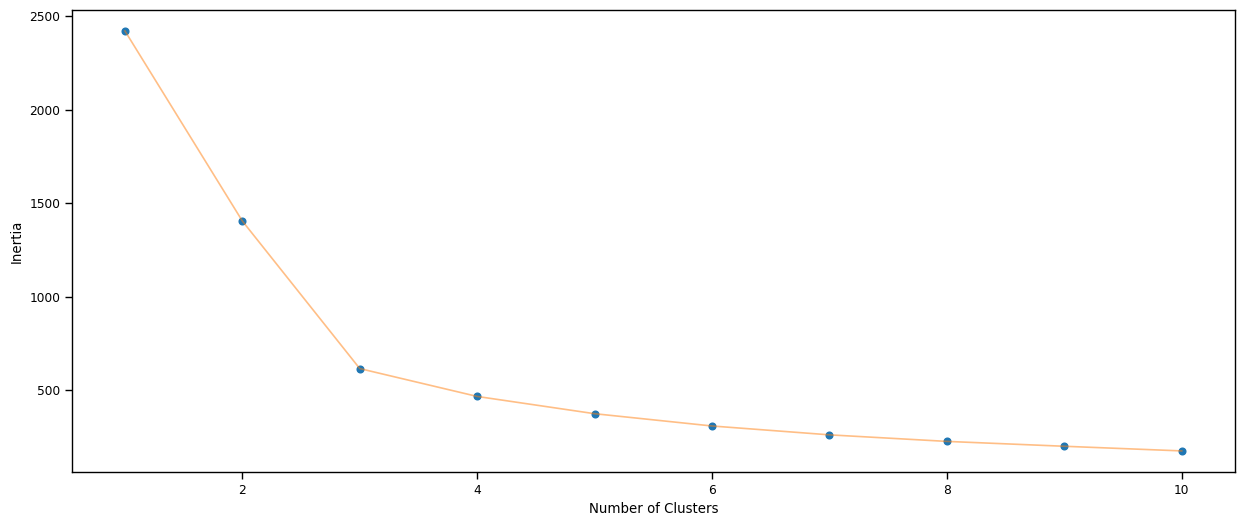

In [129]:
X2 = df_st[['precipitation', 'temp_min']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Инерция перестаёт существенно уменьшаться после 4 кластеров

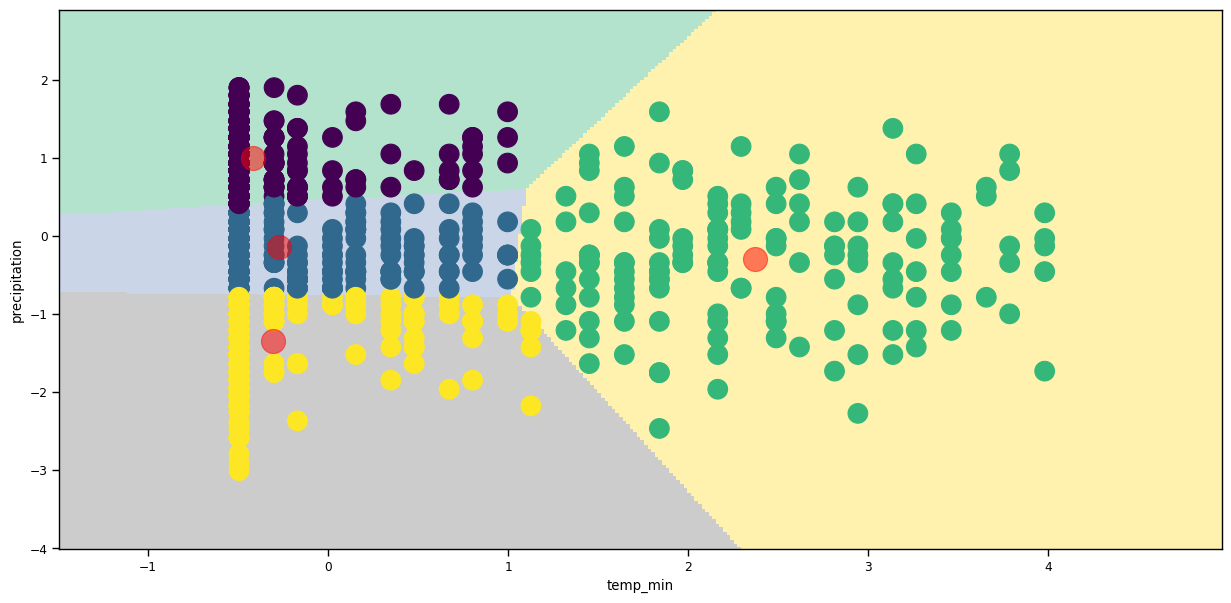

In [131]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
kmeans.fit(X2)

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'precipitation', y = 'temp_min' , data = df_st , c = kmeans.labels_ , 
            s = 200 )
plt.scatter(x = kmeans.cluster_centers_[: , 0] , y =  kmeans.cluster_centers_[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('precipitation') 
plt.xlabel('temp_min')
plt.show()

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


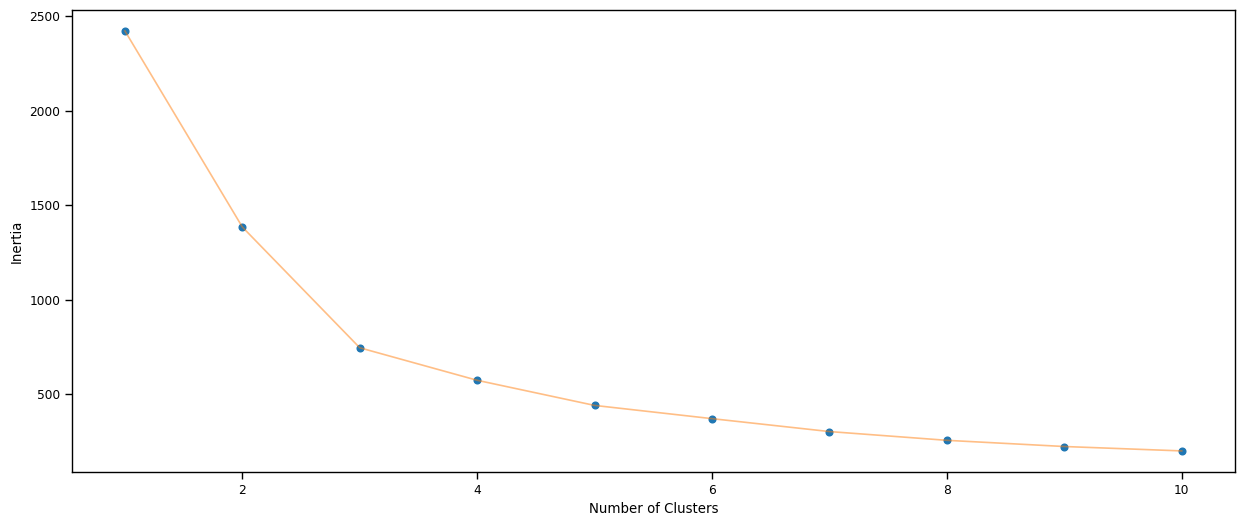

In [132]:
X3 = df_st[['precipitation', 'wind']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
    kmeans.fit(X3)
    inertia.append(kmeans.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Инерция перестаёт существенно уменьшаться после 5 кластеров

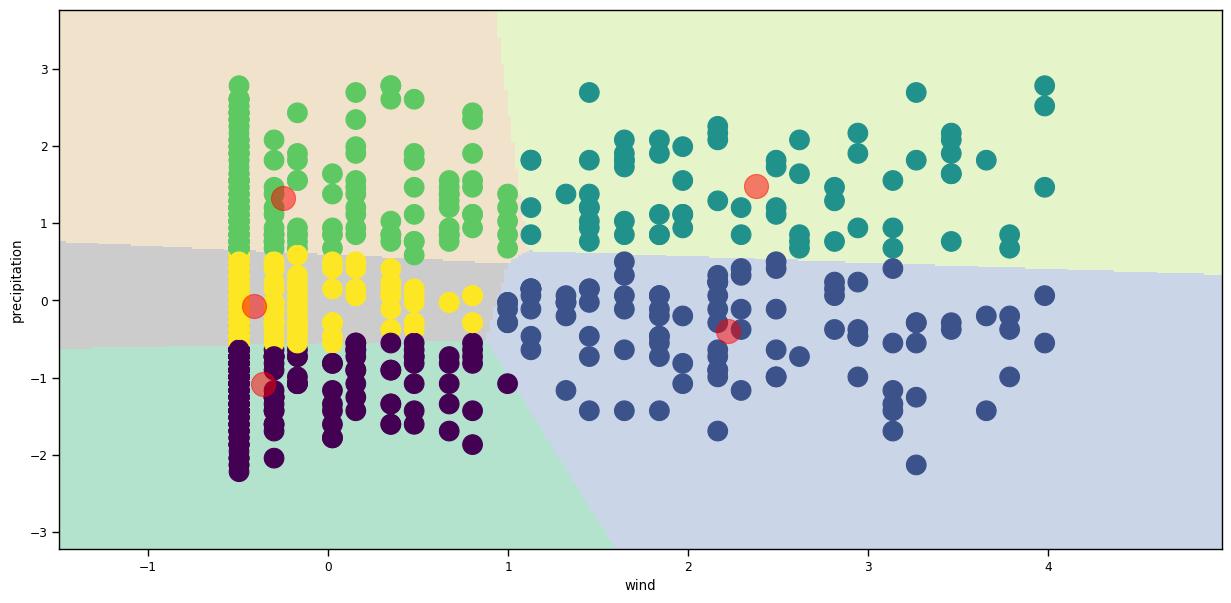

In [136]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
kmeans.fit(X3)

h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'precipitation', y = 'wind' , data = df_st , c = kmeans.labels_ , 
            s = 200 )
plt.scatter(x = kmeans.cluster_centers_[: , 0] , y =  kmeans.cluster_centers_[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('precipitation') 
plt.xlabel('wind')
plt.show()

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


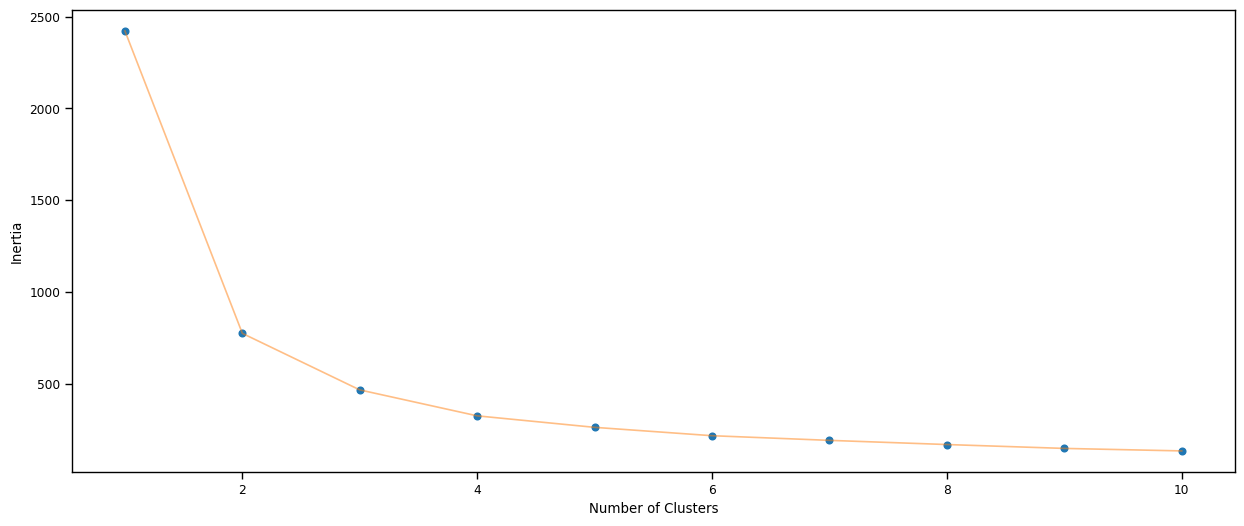

In [138]:
X4 = df_st[['temp_max', 'temp_min']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
    kmeans.fit(X4)
    inertia.append(kmeans.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Инерция перестаёт существенно уменьшаться после 5 кластеров

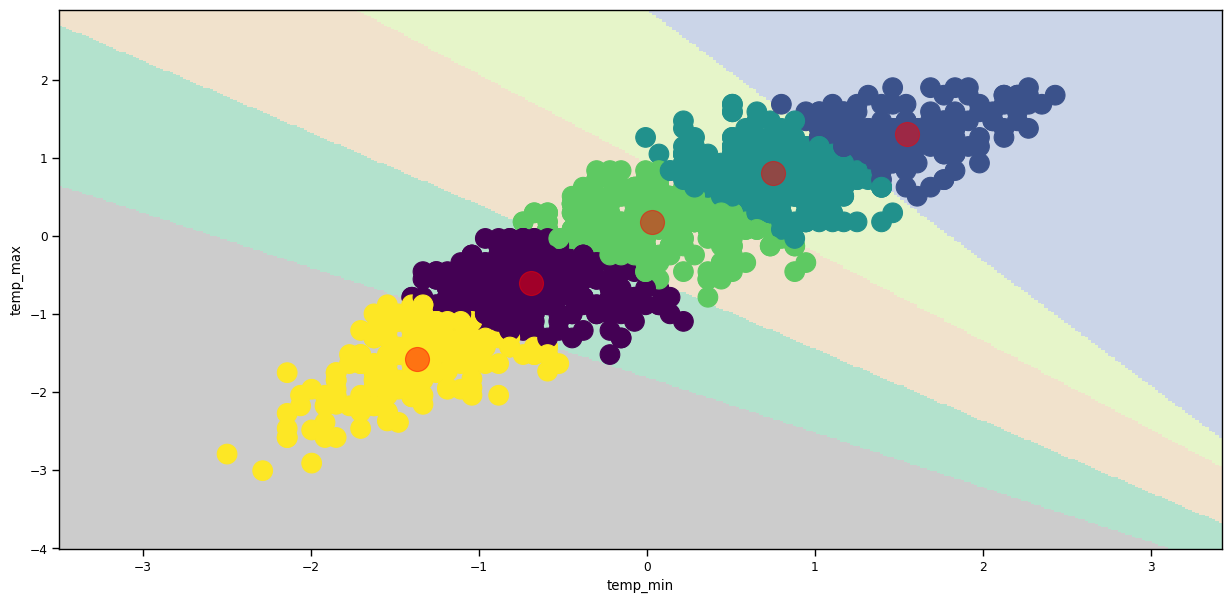

In [146]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
kmeans.fit(X4)

h = 0.02
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'temp_max', y = 'temp_min' , data = df_st , c = kmeans.labels_ , 
            s = 200 )
plt.scatter(x = kmeans.cluster_centers_[: , 0] , y =  kmeans.cluster_centers_[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('temp_max') 
plt.xlabel('temp_min')
plt.show()

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


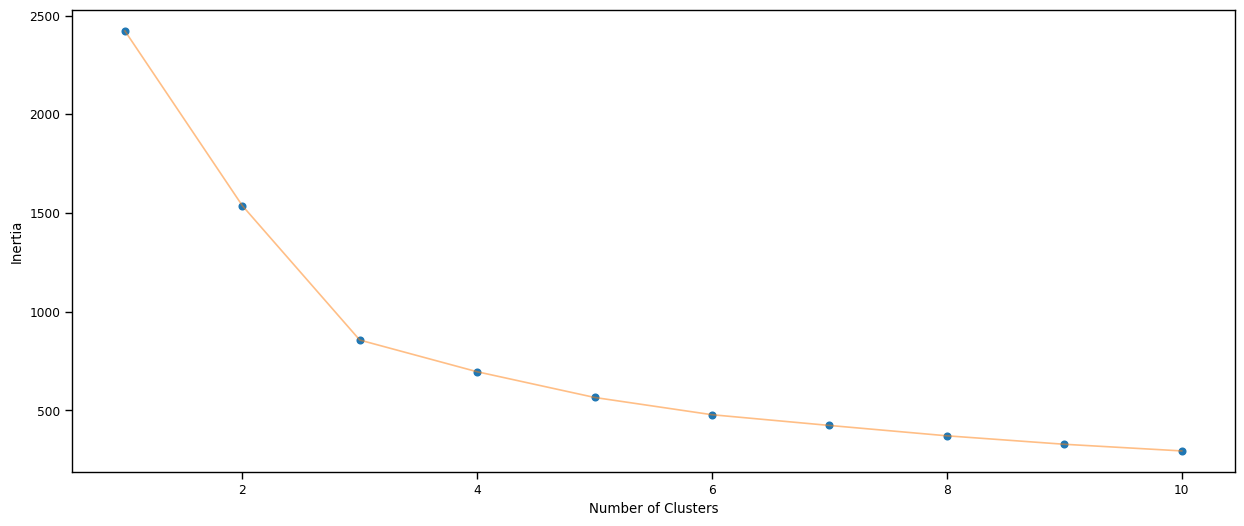

In [148]:
X5 = df_st[['temp_max', 'wind']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
    kmeans.fit(X5)
    inertia.append(kmeans.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Инерция перестаёт существенно уменьшаться после 5 кластеров

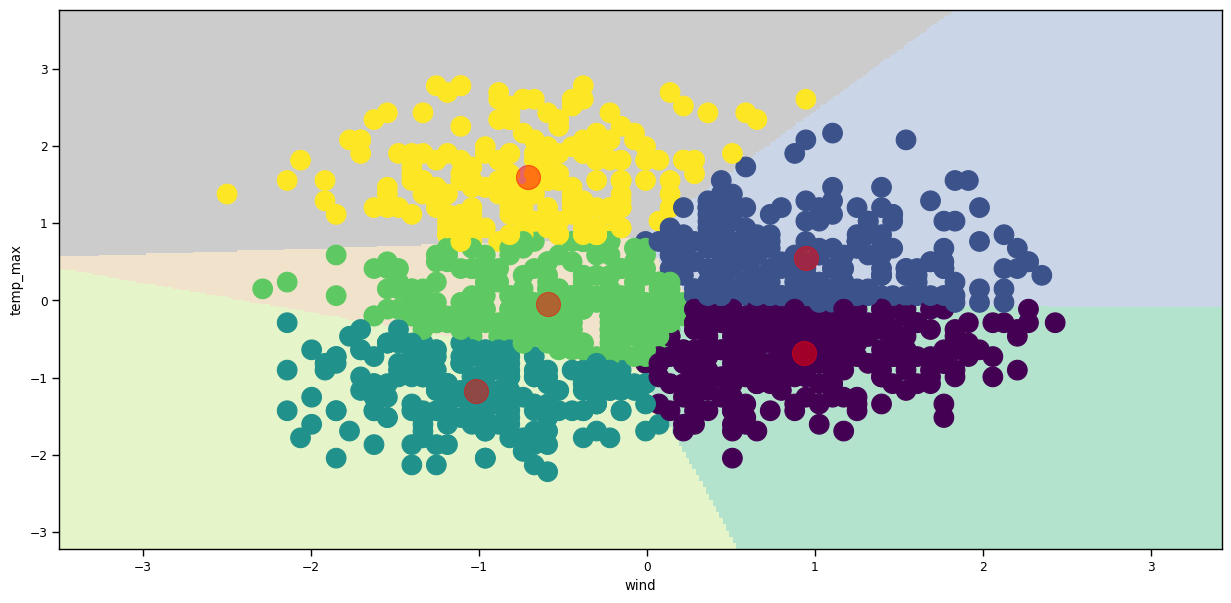

In [156]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
kmeans.fit(X5)

h = 0.02
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'temp_max', y = 'wind' , data = df_st , c = kmeans.labels_ , 
            s = 200 )
plt.scatter(x = kmeans.cluster_centers_[: , 0] , y =  kmeans.cluster_centers_[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('temp_max') 
plt.xlabel('wind')
plt.show()

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1418: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


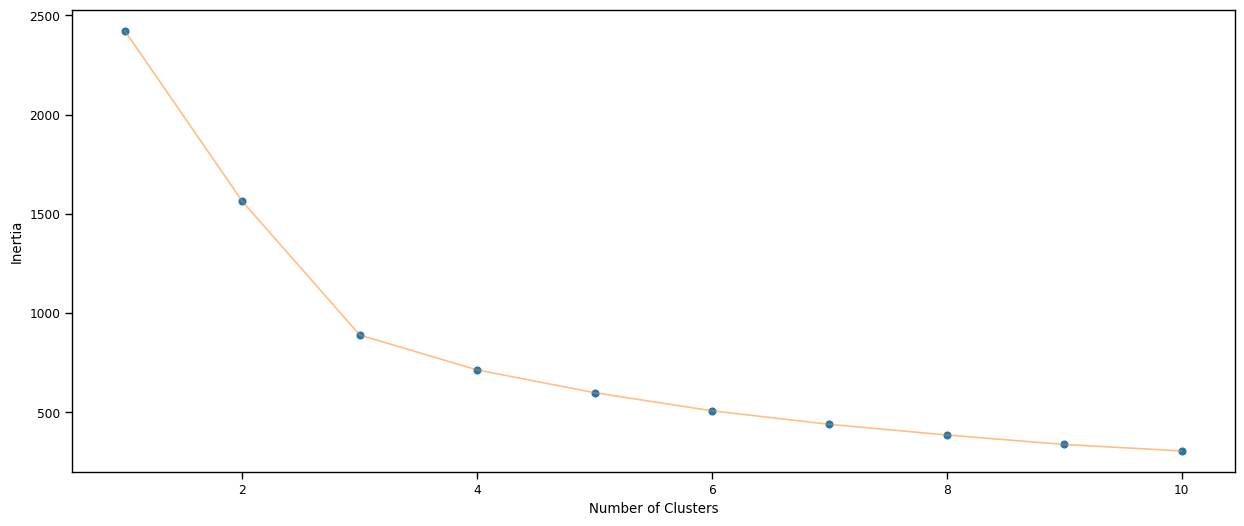

In [158]:
X6 = df_st[['temp_min', 'wind']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
    kmeans.fit(X6)
    inertia.append(kmeans.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Инерция перестаёт существенно уменьшаться после 4 кластеров

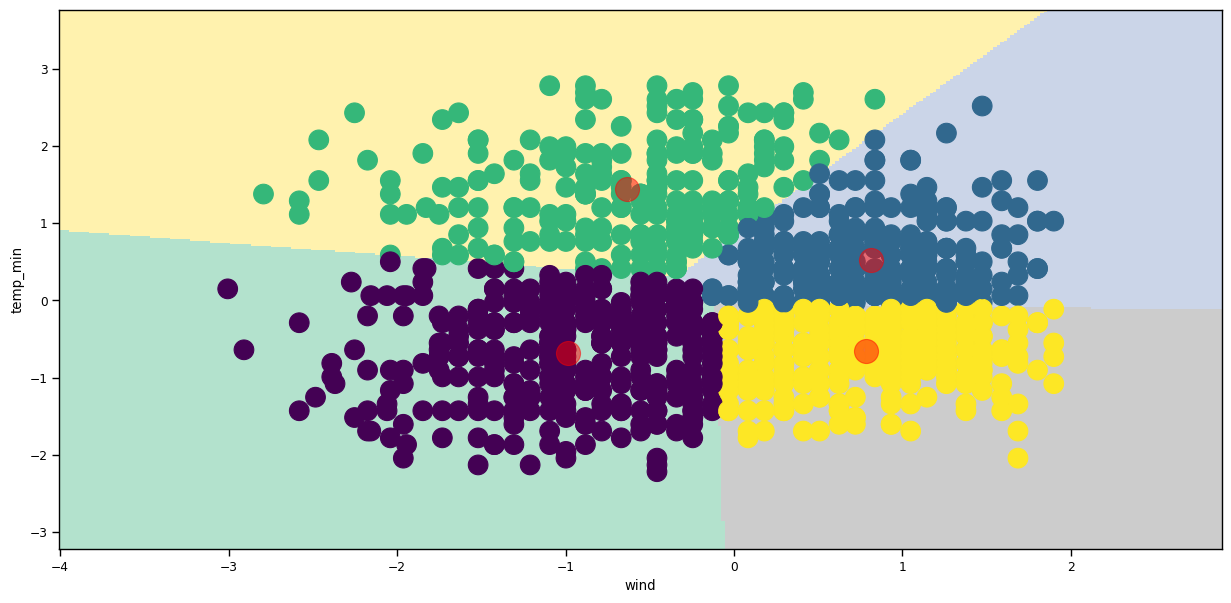

In [160]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init = 10 ,max_iter=300, tol = 0.001, random_state = 32, algorithm = 'elkan')
kmeans.fit(X6)

h = 0.02
x_min, x_max = X6[:, 0].min() - 1, X6[:, 0].max() + 1
y_min, y_max = X6[:, 1].min() - 1, X6[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'temp_min', y = 'wind' , data = df_st , c = kmeans.labels_ , 
            s = 200 )
plt.scatter(x = kmeans.cluster_centers_[: , 0] , y =  kmeans.cluster_centers_[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('temp_min')
plt.xlabel('wind')
plt.show()